In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

matplotlib.rcParams['font.family'] = 'Arial'
matplotlib.rcParams['axes.titlesize'] = 18
matplotlib.rcParams['axes.labelsize'] = 16
matplotlib.rcParams['xtick.labelsize'] = 14
matplotlib.rcParams['ytick.labelsize'] = 14

colors = ['#cc329a', '#993399', '#663399']

In [2]:
data = pd.read_csv("corr_masked_hip_acc.csv")

In [3]:
data.head()

,Unnamed: 0,subject,age_group,age_num,run,z,chance_score,distance
0,0,222,6-9yo,6.92,1,0.057816,27.186243,23.060392
1,1,222,6-9yo,6.92,2,0.311313,28.611580,22.545058
2,2,222,6-9yo,6.92,3,-0.061790,17.532103,26.525683
3,3,222,6-9yo,6.92,4,0.085969,44.279119,17.449942
4,4,222,6-9yo,6.92,5,0.130900,0.902222,30.382708


In [4]:
data = data[data['run'] > 3]

/var/folders/_3/899wmrf54_v14hn3_4nx__9m0000gq/T/ipykernel_74676/3495254042.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = subject_avg.groupby('age_group')['z'].agg(['mean', 'sem']).reindex(age_order).reset_index()


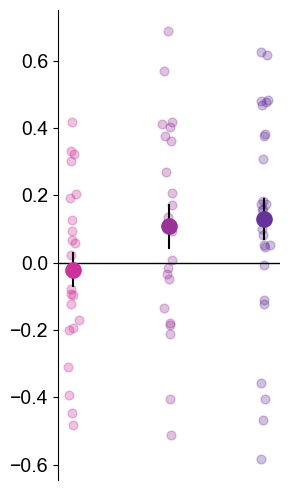

In [15]:
# average within subject and order age groups for plot
subject_avg = data.groupby(['subject', 'age_group'])['z'].mean().reset_index()
age_order = ['6-9yo', '10-12yo', 'Adults']
subject_avg['age_group'] = pd.Categorical(subject_avg['age_group'], categories=age_order, ordered=True)
summary = subject_avg.groupby('age_group')['z'].agg(['mean', 'sem']).reindex(age_order).reset_index()


plt.figure(figsize=(3, 5))

# subject points
for i, age in enumerate(age_order):
    y_vals = subject_avg[subject_avg['age_group'] == age]['z']
    x_jittered = i + np.random.normal(0, 0.025, size=len(y_vals))
    plt.scatter(x_jittered, y_vals, color=colors[i], alpha=0.3, s=40, edgecolors = None)

# group means
for i, (mean, sem) in enumerate(zip(summary['mean'], summary['sem'])):
    plt.errorbar(
        i, mean, yerr=sem,
        fmt='o',
        color='black',               # error bar
        markerfacecolor=colors[i],  # fill color
        markeredgewidth=0,         
        markersize=12,
        capsize=0,
        linewidth=1.5
    )


# adding labels and titles in final version in illustrator for consistent formatting
plt.xticks(ticks=range(len(age_order)), labels=[])

plt.tick_params(axis='x', length=0)
plt.axhline(0, color='black', linewidth=1)
plt.gca().spines[['top', 'bottom','right']].set_visible(False)


plt.tight_layout()
plt.savefig("agegroup_similarity_plot.svg", format='svg', bbox_inches='tight')
plt.show()


/var/folders/_3/899wmrf54_v14hn3_4nx__9m0000gq/T/ipykernel_74676/2011205763.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = subject_avg.groupby('age_group')['z'].agg(['mean', 'sem']).reindex(age_order).reset_index()


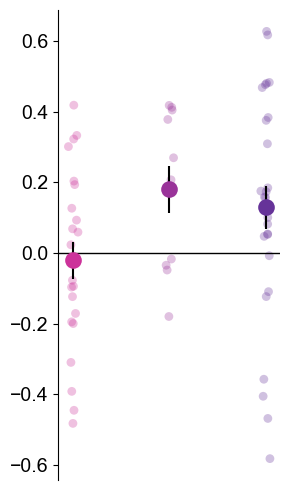

In [17]:
# plot with high-performing adolescents, identified via median split
perf_df = data.groupby(['subject', 'age_group'])['chance_score'].mean().reset_index()
adolescents = perf_df[perf_df['age_group'] == '10-12yo']
median_perf = adolescents['chance_score'].median()
high_perf_ids = adolescents[adolescents['chance_score'] > median_perf]['subject']

# keep all children and adults, only high-performing 10–12yo
keep_ids = perf_df[
    (perf_df['age_group'].isin(['6-9yo', 'Adults'])) |
    (perf_df['subject'].isin(high_perf_ids))
]['subject']
filtered_data = data[data['subject'].isin(keep_ids)]


subject_avg = filtered_data.groupby(['subject', 'age_group'])['z'].mean().reset_index()
age_order = ['6-9yo', '10-12yo', 'Adults']
subject_avg['age_group'] = pd.Categorical(subject_avg['age_group'], categories=age_order, ordered=True)

summary = subject_avg.groupby('age_group')['z'].agg(['mean', 'sem']).reindex(age_order).reset_index()


plt.figure(figsize=(3, 5))

for i, age in enumerate(age_order):
    y_vals = subject_avg[subject_avg['age_group'] == age]['z']
    x_jittered = i + np.random.normal(0, 0.025, size=len(y_vals))
    plt.scatter(x_jittered, y_vals, color=colors[i], alpha=0.3, s=40, edgecolors='none')

for i, (mean, sem) in enumerate(zip(summary['mean'], summary['sem'])):
    plt.errorbar(
        i, mean, yerr=sem,
        fmt='o',
        color='black',
        markerfacecolor=colors[i],
        markeredgewidth=0,
        markersize=12,
        capsize=0,
        linewidth=1.5
    )


plt.xticks(ticks=range(len(age_order)), labels=[])

plt.tick_params(axis='x', length=0)
plt.axhline(0, color='black', linewidth=1)
plt.gca().spines[['top', 'bottom', 'right']].set_visible(False)

plt.tight_layout()
plt.savefig("filtered_highperf_adolescents_plot.svg", format='svg', bbox_inches='tight')
plt.show()
